# Modelación de concentrados minerales


## Tabla de contenidos

* [Introducción](#intro) 
* [Objetivos](#objectives)
* [Preprocesamiento de datos](#data_review)
* [Análisis exploratorio de datos](#eda)
* [Evaluación y validación de modelos](#model_evaluation)
* [Conclusiones](#end)

## Introducción<a id='intro'></a>

El proceso de concentración de minerales es un conjunto de técnicas y operaciones que se utilizan para separar y concentrar los minerales valiosos de los minerales no valiosos o estériles presentes en un mineral de mena. El objetivo principal de este proceso es obtener un concentrado de alto contenido de los minerales valiosos que se pueden vender y procesar posteriormente.

El proceso de concentración de minerales puede variar dependiendo del tipo de mineral y de las propiedades específicas de los minerales que se desean concentrar. Sin embargo, en general, el proceso incluye las siguientes etapas:

* Trituración: El mineral de mena se reduce a un tamaño adecuado para la separación de los minerales valiosos.
 
* Molienda: El mineral triturado se muele en un molino para producir un polvo fino.

* Flotación: Se agrega un reactivo químico al polvo de mineral molido para hacer que los minerales valiosos se adhieran a burbujas de aire, mientras que los minerales no valiosos se hunden en el fondo. Los minerales valiosos flotan a la superficie y se recogen como un concentrado.

* Separación magnética: Si el mineral de mena contiene minerales magnéticos, se puede utilizar un separador magnético para separar los minerales valiosos de los minerales no valiosos.

* Lixiviación: Si el mineral de mena es soluble en agua, se puede utilizar la lixiviación para disolver los minerales valiosos y separarlos de los minerales no valiosos.

* Espesamiento y filtración: Después de la separación, el concentrado se espesa y se filtra para eliminar cualquier impureza restante.

En resumen, el proceso de concentración de minerales es un proceso complejo que implica una serie de etapas y técnicas para separar y concentrar los minerales valiosos. Este proceso es fundamental para la minería y permite la producción de minerales de alta calidad que se utilizan en diversos procesos industriales.

En este proyecto, se modelará la producción de concentrado de oro de una mina, con un proceso metalúrgico simplificado (flotación>primera etapa de limpieza>segunda etapa de limpieza).



## Objetivos<a id='objectives'></a>

* Modelar la producción de concentrados minerales de una mina con un proceso metalúrgico simplificado.   

## Preprocesamiento de datos<a id='data_review'></a>

Empezaremos por importar las librerías necesarias para el proyecto.

In [196]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from scipy import stats as st
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

Se explorarán los datos de forma general.

In [2]:
gold_recovery_train = pd.read_csv("/datasets/gold_recovery_train.csv")

In [3]:
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
gold_recovery_test = pd.read_csv("/datasets/gold_recovery_test.csv")

In [6]:
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
gold_recovery_full = pd.read_csv("/datasets/gold_recovery_full.csv")

In [9]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Se constata que existen valores ausentes en todos los conjuntos de datos. Adicionalmente, existen características que están presentes en el conjunto de entrenamiento, pero no en el de prueba. 

Inicialmente, se comprobará que el cálculo de la recuperación sea correcto. Se calculará la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. La ecuación para el cálculo de la recuperación es la siguiente:


$$
Recuperación = \frac {C*(F-T)}{F*(C-T)}*100%
$$


en donde:

* C — proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)
* F — la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final)
* T — la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)

En ese sentido, procederemos a identificar/asociar el nombre de las variables en el conjunto de los datos con el de las variables de la ecuación, para proceder con la verificación de cálculos.

**Variable C**

roguher.output.cocnetrate_au = proporción de oro en el concentrado justo después de la flotación  <br>
final.output.concentrate_au = proporción de oro en el concentrado después de la purificación <br>

$$
C = \frac {rougher.output.concentrate\_au}{final.output.concentrate\_au}
$$

**Variable F**

rougher.input.feed_au = proporción de oro en la alimentación antes de la flotación <br>
roguher.output.cocnetrate_au = proporción de oro en el concentrado justo después de la flotación <br>

$$
F = \frac {rougher.input.feed\_au}{final.output.concentrate\_au}
$$

**Variable T**

rougher.out.tail_au = proporción de oro en las colas rougher justo después de la flotación <br>
final.output.tail_au = proporción de oro en las colas rougher después de la purificación <br>

$$
T = \frac {rougher.out.tail\_au}{final.output.tail\_au}
$$

In [11]:
#Comprobación de cálculos de recuperación (de oro)

rougher_output_recovery_calculation_au = 100 * (gold_recovery_train['rougher.output.concentrate_au'] * (gold_recovery_train['rougher.input.feed_au'] - gold_recovery_train['rougher.output.tail_au'])) / (gold_recovery_train['rougher.input.feed_au'] * (gold_recovery_train['rougher.output.concentrate_au'] - gold_recovery_train['rougher.output.tail_au']))
rougher_output_verification_au = pd.DataFrame({"output_recovery":gold_recovery_train["rougher.output.recovery"],"recovery_calculation":rougher_output_recovery_calculation_au}).dropna()
MAE = mean_absolute_error(rougher_output_verification_au["output_recovery"],rougher_output_verification_au["recovery_calculation"])
print(f"MAE={MAE}")

MAE=1.0724115653039479e-14


Como se puede apreciar del resultado de MAE, el mismo es bastante bajo. Por lo que podemos confiar en que el resultado es correcto.

A continuación se analizarán las características no disponibles en el conjunto de prueba. 

In [12]:
# Aislamiento de características que no se encuentran en el conjunto de prueba

column_names_full = list(gold_recovery_full.columns.values)
column_names_test = list(gold_recovery_test.columns.values)
all_column_names = column_names_full + column_names_test
columns_not_in_test = pd.Series(all_column_names)
columns_not_in_test = columns_not_in_test.unique()
columns_not_in_test_df = gold_recovery_full[columns_not_in_test]
columns_not_in_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Este análisis nos permite entender que  este conjunto de datos no dispone de las variables objetivo. En ese sentido, se anexarán estos datos a la base de prueba desde el conjunto de datos completo.   

In [13]:
# Se incorporan los datos objeto en la base de datos de prueba

gold_recovery_test = gold_recovery_test.merge(gold_recovery_full[['final.output.recovery', 'rougher.output.recovery']], how='left', left_index=True, right_index=True)
gold_recovery_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

Por otra parte, el principal problema de las bases de datos es que tienen valores ausentes. De acuerdo a las condiciones estblecidas en la descripción del proyecto, **"Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares."**. En ese sentido, se rellenarán los valores ausentes con los datos de los valores más cercanos en el tiempo (de cada variable).  


In [14]:
# Estadística descriptiva de la base de datos completa

gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [15]:
# Relleno de datos de la base de datos completa

gold_recovery_full = gold_recovery_full[~gold_recovery_full['final.output.recovery'].isna()]
gold_recovery_full = gold_recovery_full[~gold_recovery_full['rougher.output.recovery'].isna()]
gold_recovery_full = gold_recovery_full.fillna(method='ffill')

In [16]:
# Estadística descriptiva de la base de datos completa después del relleno de datos

gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,...,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000
mean,5.168387,9.978821,9.429902,44.076513,67.050208,9.688487,2.694897,10.582894,3.042467,144.542451,...,18.983858,-485.898569,15.010207,-461.084281,15.694160,-488.685145,12.198011,-487.150508,18.958458,-505.441125
std,1.372362,1.669228,2.865629,5.129784,10.125840,2.328624,0.958836,2.868996,0.922808,44.593704,...,5.414887,47.760684,4.890153,67.408385,5.510983,34.532835,5.332969,38.346443,5.550514,37.694079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251000,9.137225,7.662953,43.402215,63.299712,8.062715,2.027553,8.937983,2.461138,114.051097,...,14.975304,-500.705070,11.940211,-500.187767,10.988528,-500.458573,8.971074,-500.129482,14.983005,-500.728189
50%,5.066039,10.102264,9.184826,45.011244,68.172738,9.743106,2.743965,10.622340,2.984909,143.205708,...,18.017317,-499.837795,14.970988,-499.459790,14.999920,-499.802639,11.019389,-499.935338,19.960511,-500.048424
75%,5.895401,11.035644,10.920957,46.275313,72.686642,11.134242,3.329206,12.104122,3.571351,175.035538,...,23.012460,-498.249814,19.034114,-400.118175,18.026184,-498.384191,14.019040,-499.437546,24.002617,-499.495403
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Los datos se rellenaron sin mayor impacto en los resultados de la estadística descriptiva. A conitnuación, se eliminará la columna "date".

In [17]:
# Eliminación de la columna "date" de la base de datos completa (comprobación del relleno de datos)

gold_recovery_full = gold_recovery_full.drop('date', axis=1)
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 22715
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                                19439 non-null  float64


In [19]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 22715
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                                19439 non-null  float64


In [20]:
# Estadística descriptiva del conjunto de entrenamiento 

gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [21]:
# Relleno de datos del conjunto de entrenamiento 

gold_recovery_train = gold_recovery_train[~gold_recovery_train['final.output.recovery'].isna()]
gold_recovery_train = gold_recovery_train[~gold_recovery_train['rougher.output.recovery'].isna()]
gold_recovery_train = gold_recovery_train.fillna(method='ffill')

In [22]:
# Estadística descriptiva del conjunto de entrenamiento  después del relleno de datos

gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,...,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,5.141921,10.132848,9.109311,44.003792,66.518832,9.607035,2.583179,10.510889,2.918421,133.213938,...,19.979788,-478.702912,15.486812,-460.237231,16.774657,-483.957839,13.064236,-483.967726,19.576675,-506.805007
std,1.369603,1.654925,2.886929,4.905261,10.295402,2.319069,0.983118,3.003888,0.903712,39.604988,...,5.663611,50.739376,5.255555,58.848850,5.831978,37.892065,5.765567,39.206771,5.764496,37.086065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211500,9.296833,7.422466,43.276111,62.545817,7.997429,1.889827,8.810653,2.368607,106.859801,...,14.990463,-500.628716,11.894590,-500.149141,11.083699,-500.363203,8.994384,-500.105994,14.989244,-500.745309
50%,4.994607,10.297013,8.801909,44.872436,67.432775,9.480270,2.581476,10.514141,2.851025,132.999290,...,20.001601,-499.681587,14.975474,-499.388853,17.931987,-499.702479,11.997537,-499.914556,19.984165,-500.061488
75%,5.859495,11.170578,10.452148,46.166425,72.346428,11.003707,3.237211,11.932186,3.434764,159.825396,...,24.990768,-477.486391,20.059286,-400.039047,21.346135,-487.864322,17.982826,-453.274822,24.991615,-499.536481
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [23]:
# Eliminación de la columna "date" del conjunto de entrenamiento (Comprobación del relleno de datos)

gold_recovery_train = gold_recovery_train.drop('date', axis=1)
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


In [25]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


In [26]:
# Estadística descriptiva del conjunto de datos de prueba

gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5242.000000,5026.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694,64.107067,77.360519
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839,10.355484,14.617529
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706,0.000000,0.000000
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821,60.415294,74.577277
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085,65.453822,80.105630
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621,69.881394,84.754666
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593,100.000000,99.132729


In [27]:
# Relleno de datos del conjunto de prueba

gold_recovery_test = gold_recovery_test.fillna(method='ffill')

In [28]:
# Estadística descriptiva del conjunto de datos de prueba después del relleno de datos 

gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
count,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,...,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,162.554324,8.208602,7.264651,1.289764,1481.920139,-509.135662,1486.909560,-511.818170,1468.550426,-509.813742,...,13.145549,-476.482815,12.306264,-512.273393,9.474249,-505.107329,16.683402,-512.409646,63.636232,76.553502
std,59.881844,3.585595,0.611526,0.713785,311.364048,61.488438,314.173253,67.260305,310.943760,62.817933,...,4.305976,105.576707,3.764502,59.024123,3.314487,68.908194,5.409792,70.004326,11.425602,15.903048
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706,0.000000,0.000000
25%,136.587127,6.037306,6.885625,0.850854,1497.219854,-500.454275,1497.171993,-500.956595,1437.697158,-501.297283,...,11.885401,-500.418695,10.128679,-500.876879,7.991405,-500.225402,13.012903,-500.832879,59.786639,74.016763
50%,172.969228,8.001580,7.259333,1.148013,1555.061445,-500.000493,1553.480236,-500.068934,1546.559915,-500.076600,...,14.952876,-499.640279,12.080307,-500.046203,9.982950,-500.002692,16.007567,-500.039297,65.367362,80.050481
75%,205.165772,10.005431,7.650000,1.706076,1601.731457,-499.576625,1601.833181,-499.325756,1600.831461,-499.001066,...,15.938679,-401.623704,15.017197,-499.292324,11.992677,-499.723275,21.008915,-499.385866,69.855673,84.867463
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593,100.000000,99.132729


In [29]:
# Eliminación la columna "date" del conjunto de prueba (comprobación reelleno de datos)

gold_recovery_test = gold_recovery_test.drop('date', axis=1)
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5856 non-null   float64
 1   primary_cleaner.input.depressant            5856 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5856 non-null   float64
 10  primary_clea

In [31]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5856 non-null   float64
 1   primary_cleaner.input.depressant            5856 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5856 non-null   float64
 10  primary_clea

### Conclusiones intermedias preprocesamiento de datos

* En la comprobación de los valores de recuperación de oro, se obtuvo un valor de MAE= 1.07e-14. El valor es bastante bajo, por lo que podemos confiar en que los cálculos son correctos.

* Las variables que se encuentran en el conjunto de prueba no disponen de las variables objetivo. En ese sentido, se incorporaron los datos objetivo (de la base de datos completa) al conjuto de prueba.

* El principal problema del conjunto de datos fue la presencia de valores ausentes. En ese sentido, rellenó cada columna con el valor más cercano en el tiempo de la característica, por cuanto en el contexto de este proyecto los valores próximos en el tiempo se asemejan. Adicionalmente, se eliminó la característica "date" de los conjuntos de datos por cuanto la misma no es últil en la modelación.

## Análisis exploratorio de datos (EDA) <a id='eda'></a>

### Variación de la concentración de metales 

El EDA empezará analizando la variación de la concentración de metales en función de la etapa de purificación. En virtud de que los datos de entrenamiento son los mismos que los datos del conjuto completo, y que conjunto de prueba no contine datos objetivo, se utilizará el conjunto completo para este análisis.En el siguiente gráfico se visualiza esta variación. 

In [32]:
#Data preparation for plotting (phase 1)

rougher_au = gold_recovery_full['rougher.output.concentrate_au']
primary_au = gold_recovery_full['primary_cleaner.output.concentrate_au']
final_au = gold_recovery_full['final.output.concentrate_au']
rougher_ag = gold_recovery_full['rougher.output.concentrate_ag']
primary_ag = gold_recovery_full['primary_cleaner.output.concentrate_ag']
final_ag = gold_recovery_full['final.output.concentrate_ag']
rougher_pb = gold_recovery_full['rougher.output.concentrate_pb']
primary_pb = gold_recovery_full['primary_cleaner.output.concentrate_pb']
final_pb = gold_recovery_full['final.output.concentrate_pb']

In [33]:
#Data preparation function (for plotting)

def data_preparation(stage,data,mineral):
    
    """
    This function orders the data to plot to Seaborn format
    
    """
    
    mineral_df = pd.DataFrame(columns=['Concentration', 'Mineral','Stage'])
    
    mineral_df['Concentration'] = data
    mineral_df['Mineral'] = mineral
    mineral_df['Stage'] = stage
    
    return mineral_df

In [34]:
#Data preparation for plotting (phase 2)

rougher_au_df = data_preparation('Rougher',rougher_au,'Au')
primary_au_df = data_preparation('Primary',primary_au,'Au')
final_au_df = data_preparation('Final',final_au,'Au')

rougher_ag_df = data_preparation('Rougher',rougher_ag,'Ag')
primary_ag_df = data_preparation('Primary',primary_ag,'Ag')
final_ag_df = data_preparation('Final',final_ag,'Ag')

rougher_pb_df = data_preparation('Rougher',rougher_pb,'Pb')
primary_pb_df = data_preparation('Primary',primary_pb,'Pb')
final_pb_df = data_preparation('Final',final_pb,'Pb')

frames = [rougher_au_df, primary_au_df,final_au_df,
         rougher_ag_df,primary_ag_df,final_ag_df,
         rougher_pb_df,primary_pb_df,final_pb_df]

concentrations_dataframe = pd.concat(frames)

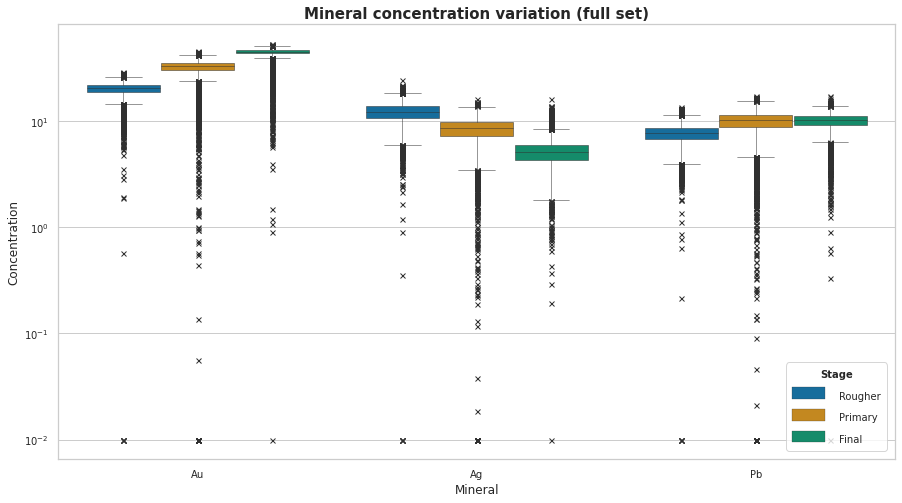

In [184]:
# Plot

#Figure size
plt.figure(figsize=(15, 8))

#Figure type
sns.set_theme(style="ticks", palette="colorblind")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
g = sns.boxplot(x = concentrations_dataframe['Mineral'],
            y = concentrations_dataframe['Concentration'],
            hue = concentrations_dataframe['Stage'],
            linewidth=0.5, fliersize=5,flierprops={"marker": "x"})

# Add plot title and axis labels
plt.title('Mineral concentration variation (full set)', fontweight="bold", fontsize = 15)
plt.xlabel('Mineral', fontsize = 12)
plt.ylabel('Concentration', fontsize = 12)

# for legend text
plt.setp(g.get_legend().get_texts(), fontsize='10')

# for legend title
plt.setp(g.get_legend().get_title(), fontsize='10', fontweight="bold")

#for labels axis 
g.xaxis.set_tick_params(labelsize=10)
g.yaxis.set_tick_params(labelsize=10)

# Y scale
plt.yscale('log')

El gráfico nos permite comprender que el proceso está diseñado para la recuperación de oro. En ese sentido, ocurre lo que esperaríamos, es decir que la concentración de oro sube con cada etapa del proceso (lo cual no ocurre con los otros dos minerales). También es importante señalar que, sobretodo para los datos de concentración de oro, al parecer existen valores atípicos (por debajo de la mediana) que posiblemente se deben eliminar. Adicionalmente, se graficarán histogramas.

<Figure size 1080x1080 with 0 Axes>

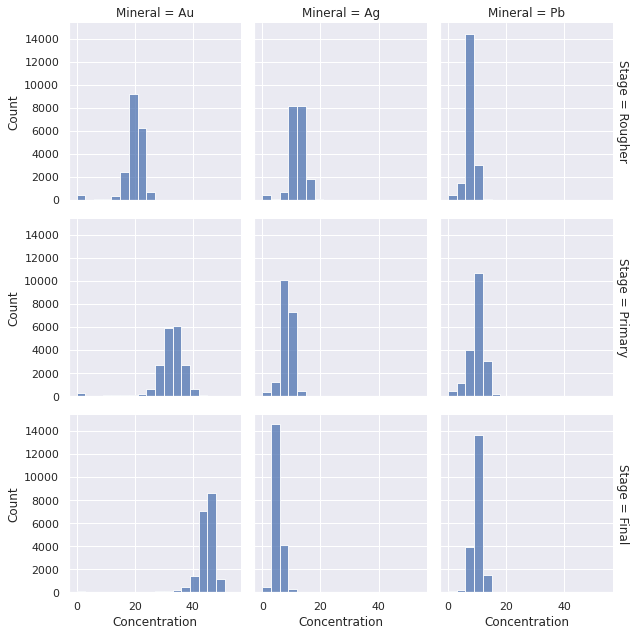

In [189]:
#Figure size
plt.figure(figsize=(15, 15))

sns.set_theme(style="darkgrid")
sns.displot(
    concentrations_dataframe, x='Concentration', col='Mineral', row='Stage',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

### Distribución del tamaño de particulas en la alimentación

Si existe una variación significativa en la distribución del tamaño de partículas entre el conjuto de entrenamiento y prueba, la evaluación del modelo no será correcta. Por lo tanto, se investigará este aspecto a continuación.

In [36]:
#Data preparation for plotting (phase 1)

feed_size_train = gold_recovery_train['rougher.input.feed_size']
feed_size_test = gold_recovery_test['rougher.input.feed_size']

In [37]:
#Data preparation function (for plotting)

def data_preparation_feed(data,data_set):
    
    """
    This function orders the data to plot to Seaborn format
    
    """
    
    feed_df = pd.DataFrame(columns=['Size', 'Set'])
    
    feed_df['Size'] = data
    feed_df['Set'] = data_set
   
    
    return feed_df

In [38]:
#Data preparation for plotting (phase 2)

feed_size_train_df = data_preparation_feed(feed_size_train,'Train')
feed_size_test_df = data_preparation_feed(feed_size_train,'Test')


frames_feed = [feed_size_train_df, feed_size_test_df]

feeds_dataframe = pd.concat(frames_feed)

El diagrama de cajas comparativo de la distribución de la variación del tamaño de las partículas que ingresan a la alimentación, determina de que no existe diferencia significativa entre los datos entre el conjunto de entrenamiento y prueba. Sin embargo, existen anomalías en los datos (por encima del valor de la mediana). Adicionalmente, se graficarán histogramas.

<Figure size 1080x1080 with 0 Axes>

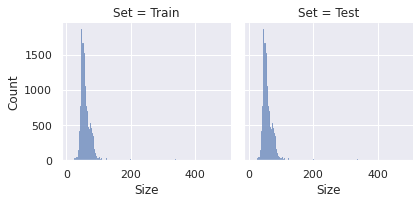

In [192]:
#Figure size
plt.figure(figsize=(15, 15))

sns.set_theme(style="darkgrid")
sns.displot(
    feeds_dataframe, x='Size', col='Set',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

### Tratamiento de valores atípicos

#### Datos de Concentración 

Como se mencionó en la sección anterior, el tratamiento de valores atípicos se enfocará en los datos de recuperación de oro para sus distintas etapas y conjuntos de datos. Para los datos de los otros minerales (Ag, Pb) no amerita el análisis por cuanto no se aprecian valores extremos de la distribución de sus datos de concentación. Adicionalmente, cabe mencionar que el análisis se realizará para los conjuntos de datos completos y de entrenamiento, puesto que no existen datos objetivo en el conjunto de prueba.  

**Exploración inicial datos del conjunto de datos completo**

**Histogramas**

In [40]:
# Se declaran las variables para el EDA

variables = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
             'final.output.concentrate_au']

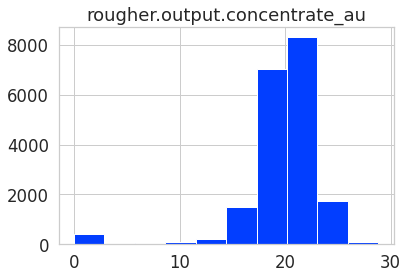

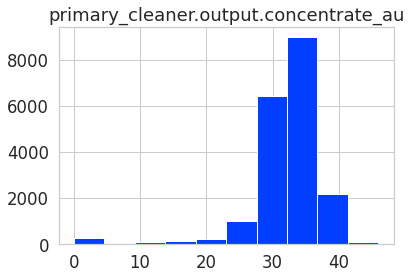

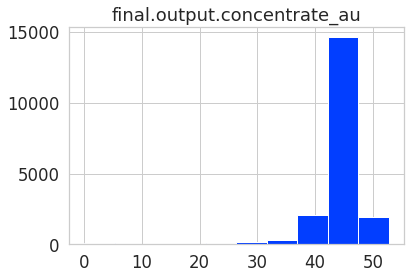

In [41]:
# Bucle para graficar histogramas

for i in range(len(variables)):
    gold_recovery_full.hist(variables[i])

**Diagramas de caja**

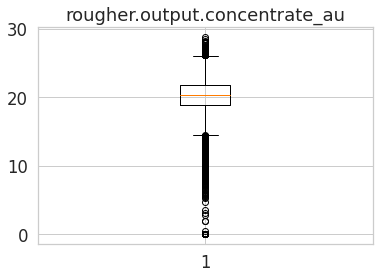

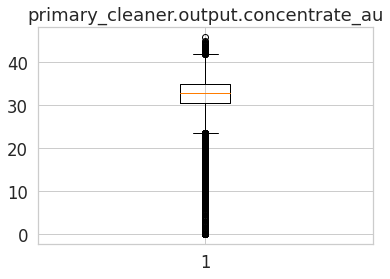

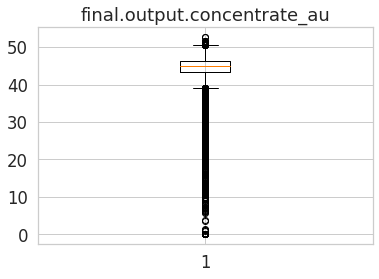

In [42]:
for variable in variables:
    plt.figure()  
    plt.boxplot(gold_recovery_full[variable])
    plt.title(variable)

**Estadística descriptiva** 

In [43]:
for variable in variables:
    print(gold_recovery_full[variable].describe())

count    19439.000000
mean        19.772000
std          3.753600
min          0.000000
25%         18.802523
50%         20.280214
75%         21.717843
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64
count    19439.000000
mean        32.119400
std          5.627611
min          0.000000
25%         30.463140
50%         32.841295
75%         35.048006
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64
count    19439.000000
mean        44.076513
std          5.129784
min          0.000000
25%         43.402215
50%         45.011244
75%         46.275313
max         52.756638
Name: final.output.concentrate_au, dtype: float64


**Detección de anomalías**

In [44]:
# Funciones para el cálculo de límites de valores atípicos 

def lower_limit(Q1,Q3):
    IQR = Q3 -Q1
    lower = round(Q1 - 1.5*IQR)
    return lower

def upper_limit(Q1,Q3):
    IQR = Q3 -Q1
    upper = round(Q3 + 1.5*IQR)
    return upper

In [45]:
# Función para el cáculo de cuantiles

def quantiles(vector):
    Q1 = round(vector.quantile(0.25))
    Q3 = round(vector.quantile(0.75))
    return Q1, Q3

In [46]:
# Cuantiles etapa de flotación

rouger_quantiles_au = gold_recovery_full['rougher.output.concentrate_au']
quantiles(rouger_quantiles_au)

(19, 22)

In [47]:
# Cuantiles etapa de purificación primaria

primary_quantiles_au = gold_recovery_full['primary_cleaner.output.concentrate_au']
quantiles(primary_quantiles_au)

(30, 35)

In [48]:
# Cuantiles etapa de purificación final

final_quantiles_au = gold_recovery_full['final.output.concentrate_au']
quantiles(final_quantiles_au)

(43, 46)

In [49]:
# Funciones para el cálculo de porcentajes de valores atípicos a ser eliminados

def atypical_percentages_lower(vector, lower_threshold, dataframe):
    sum_vector = (vector<lower_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = round((sum_vector/total_df)*100)
    return percentage

def atypical_percentages_upper(vector, upper_threshold, dataframe):
    sum_vector = (vector>upper_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = round((sum_vector/total_df)*100)
    return percentage

In [50]:
# Porcentaje de datos atípicos a ser eliminados (lower end "rouger_quantiles_au")

atypical_percentages_lower(rouger_quantiles_au, 18, gold_recovery_full)

17

In [51]:
# Porcentaje de datos atípicos a ser eliminados (lower end "primary_quantiles_au")

atypical_percentages_lower(primary_quantiles_au, 29, gold_recovery_full)

15

In [52]:
# Porcentaje de datos atípicos a ser eliminados (lower end "final_quantiles_au")

atypical_percentages_lower(final_quantiles_au, 42, gold_recovery_full)

13

Como se podía apreciar en los gráficos de caja e histogramas, la cantidad de valores atípicos en el proceso de concentración de oro es importante, y el cálculo de los porcentajes lo ratífica. Existe un porcentaje de 23% a 26% de valores atípicos en cada etapa del proceso.  

In [53]:
# Almacena los datos sin valores atípicos en un DataFrame separado

gold_recovery_full_cleaned = gold_recovery_full[(gold_recovery_full['rougher.output.concentrate_au'] > 18)
                              &(gold_recovery_full['primary_cleaner.output.concentrate_au'] > 29)
                              &(gold_recovery_full['final.output.concentrate_au'] > 42)]
gold_recovery_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12675 entries, 0 to 22712
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         12675 non-null  float64
 1   final.output.concentrate_pb                         12675 non-null  float64
 2   final.output.concentrate_sol                        12675 non-null  float64
 3   final.output.concentrate_au                         12675 non-null  float64
 4   final.output.recovery                               12675 non-null  float64
 5   final.output.tail_ag                                12675 non-null  float64
 6   final.output.tail_pb                                12675 non-null  float64
 7   final.output.tail_sol                               12675 non-null  float64
 8   final.output.tail_au                                12675 non-null  float64


**Detección y tratamiento de anomalías del conjunto de entrenamiento**

In [54]:
# Cuantiles etapa de flotación

rouger_quantiles_au = gold_recovery_train['rougher.output.concentrate_au']
quantiles(rouger_quantiles_au)

(18, 21)

In [55]:
# Cuantiles etapa de purificación primaria

primary_quantiles_au = gold_recovery_train['primary_cleaner.output.concentrate_au']
quantiles(primary_quantiles_au)

(31, 35)

In [56]:
# Cuantiles etapa de purificación final

final_quantiles_au = gold_recovery_train['final.output.concentrate_au']
quantiles(final_quantiles_au)

(43, 46)

In [57]:
# Porcentaje de datos atípicos a ser eliminados (lower end "rouger_quantiles_au")

atypical_percentages_lower(rouger_quantiles_au, 17, gold_recovery_train)

12

In [58]:
# Porcentaje de datos atípicos a ser eliminados (lower end "primary_quantiles_au")

atypical_percentages_lower(primary_quantiles_au, 30, gold_recovery_train)

18

In [59]:
# Porcentaje de datos atípicos a ser eliminados (lower end "final_quantiles_au")

atypical_percentages_lower(final_quantiles_au, 42, gold_recovery_full)

10

Para el conjunto de datos de entrenamiento, existe un porcentaje de 19% al 22% de valores atípicos en cada etapa del proceso. Estos valores serán elimiandos  

In [60]:
# Almacena los datos sin valores atípicos en un DataFrame separado

gold_recovery_train_cleaned = gold_recovery_train[(gold_recovery_train['rougher.output.concentrate_au'] > 17)
                              &(gold_recovery_train['primary_cleaner.output.concentrate_au'] > 30)
                              &(gold_recovery_train['final.output.concentrate_au'] > 42)]
gold_recovery_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9267 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         9267 non-null   float64
 1   final.output.concentrate_pb                         9267 non-null   float64
 2   final.output.concentrate_sol                        9267 non-null   float64
 3   final.output.concentrate_au                         9267 non-null   float64
 4   final.output.recovery                               9267 non-null   float64
 5   final.output.tail_ag                                9267 non-null   float64
 6   final.output.tail_pb                                9267 non-null   float64
 7   final.output.tail_sol                               9267 non-null   float64
 8   final.output.tail_au                                9267 non-null   float64
 

#### Datos de tamaño de las partículas

La detección y tratamiento de los datos de tamaño de las partículas se realizará para todos los conjuntos de datos. Además, como se mencionó anteriormente, las anomalías de esta característica se aprecian por encima de los valores de la mediana. El tratamiento se enfocará en estos datos.

In [61]:
# Cuantiles del conjunto de datos completo

feed_quantiles_full = gold_recovery_full_cleaned['rougher.input.feed_size']
quantiles(feed_quantiles_full)

(47, 62)

In [62]:
# Cuantiles del conjunto de datos de entrenamiento

feed_quantiles_train = gold_recovery_train_cleaned['rougher.input.feed_size']
quantiles(feed_quantiles_train)

(49, 64)

In [63]:
# Cuantiles del conjunto de datos de prueba

feed_quantiles_test = gold_recovery_test['rougher.input.feed_size']
quantiles(feed_quantiles_test)

(44, 62)

In [64]:
# Porcentaje de datos atípicos a ser eliminados (upper end "feed_quantiles_full")

atypical_percentages_upper(feed_quantiles_full, 62, gold_recovery_full_cleaned)

25

In [65]:
# Porcentaje de datos atípicos a ser eliminados (upper end "feed_quantiles_train")

atypical_percentages_upper(feed_quantiles_train, 64, feed_quantiles_train)

24

In [66]:
# Porcentaje de datos atípicos a ser eliminados (upper end "feed_quantiles_test")

atypical_percentages_upper(feed_quantiles_test, 62, feed_quantiles_test)

25

En virtud de que el porcentaje de datos anómalos del tamaño de partículas de ingreso al proceso de flotación es muy alto (del 24 % al 25%), y de que prácticamente no existe variación entre los datos de entrenamiento y prueba, no se eliminarán los mismos. 

### Matrices de correlación

En esta sección, se investigará que variables tienen más influencia en la recuperación de distintos minerales.

In [67]:
corrM_gol_recovery = gold_recovery_full_cleaned.corr()
 
corrM_gol_recovery

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,-0.299439,0.301470,-0.570900,0.224103,0.433066,-0.075638,-0.101778,0.193616,0.098232,...,0.116797,0.095484,0.079275,-0.138449,0.023524,0.167101,-0.003462,0.156059,0.168861,-0.040338
final.output.concentrate_pb,-0.299439,1.000000,-0.330684,-0.364218,-0.113717,-0.316630,0.284267,0.054724,-0.104086,0.028759,...,0.084036,0.003548,0.152441,0.151467,0.176776,-0.080110,0.212471,-0.102651,-0.099835,0.018631
final.output.concentrate_sol,0.301470,-0.330684,1.000000,-0.076873,0.260434,0.253806,0.184811,-0.140520,0.224670,0.285602,...,0.071311,0.134344,0.115771,-0.050872,0.069774,0.175210,0.065604,0.182188,0.325259,-0.264083
final.output.concentrate_au,-0.570900,-0.364218,-0.076873,1.000000,-0.098656,-0.121816,-0.046090,0.044784,-0.017000,-0.057588,...,-0.064702,-0.079847,-0.051605,-0.005266,-0.073269,-0.125696,-0.057241,-0.092346,-0.159727,0.036294
final.output.recovery,0.224103,-0.113717,0.260434,-0.098656,1.000000,0.181847,-0.223574,-0.081144,-0.493069,0.357153,...,0.209808,0.035997,0.187312,-0.072430,0.060395,0.022505,0.053672,0.015672,-0.029238,-0.032309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.167101,-0.080110,0.175210,-0.125696,0.022505,-0.038547,0.068967,-0.154390,0.042041,-0.111046,...,0.295766,0.763154,0.113258,0.423660,0.204186,1.000000,0.145317,0.859260,0.478820,0.261107
secondary_cleaner.state.floatbank5_b_air,-0.003462,0.212471,0.065604,-0.057241,0.053672,0.047797,0.250340,-0.146244,-0.047776,-0.003027,...,0.731693,0.356267,0.877711,0.157199,0.881290,0.145317,1.000000,0.136768,0.473265,-0.029822
secondary_cleaner.state.floatbank5_b_level,0.156059,-0.102651,0.182188,-0.092346,0.015672,-0.028654,0.084769,-0.159195,0.073766,-0.081574,...,0.268306,0.673647,0.124224,0.382210,0.195899,0.859260,0.136768,1.000000,0.451054,0.259661
secondary_cleaner.state.floatbank6_a_air,0.168861,-0.099835,0.325259,-0.159727,-0.029238,0.008879,0.080566,-0.127868,0.129458,-0.144748,...,0.266650,0.526011,0.343441,0.049252,0.467387,0.478820,0.473265,0.451054,1.000000,0.068130


Se aprecia una correlación inversamente proporcional entre la concentración final de oro y los otros minerales. Las correlaciones son de -0.57 con la concentración de plata y -0.36 con la de plomo. Es decir, mientras más oro se recupere, menos concentración de los otros minerales se obtendrá. Este resultado es consistente con lo detectado con los diagramas de cajas.

### Conclusiones intermedias del análisis exploratorio de datos

* El diagrama de cajas para analizar la variación de las concetraciones de los minerales en cada etapa del proceso de recuperación nos permite comprender que el mismo está diseñado para la recuperación de oro. En ese sentido, ocurre lo que esperaríamos, es decir que la concentración de oro sube con cada etapa del proceso (lo cual no ocurre con los otros dos minerales). 

* El diagrama de cajas comparativo de la distribución de la variación del tamaño de las partículas que ingresan a la alimentación, determina de que no existe diferencia significativa entre los datos del conjuto de entrenamiento y prueba. Sin embargo, existen anomalías en los datos (por encima del valor de la mediana). 

* La cantidad de valores atípicos en el proceso de concentración de oro es importante, y el cálculo de los porcentajes lo ratificó. Existe un porcentaje de 23% a 26% de valores atípicos en cada etapa del proceso (los mismos fueron eliminados).

* En virtud de que el porcentaje de datos anómalos del tamaño de partículas de ingreso al proceso de flotación es muy alto (del 24 % al 25%), y de que prácticamente no existe variación entre los datos de entrenamiento y prueba, los mismos no fueron eliminados.

* Se aprecia una correlación inversamente proporcional entre la concentración final de oro y los otros minerales. Las correlaciones son de -0.57 con la concentración de plata y -0.36 con la de plomo. Es decir, mientras más oro se recupere, menos concentración de los otros minerales se obtendrá. Este resultado es consistente con lo detectado con los diagramas de cajas.

## Evaluación y validación de modelos<a id='model_evaluation'></a>

En esta sección se entrenarán direrentes modelos para medir la eficiencia en la recuepración de oro. Con el fin de evaluar estos modelos, se calculará el error medio absoluto porcentual simétrico (sMAPE por sus siglas en inglés). Esta métrica se calcula de la siguiente manera:

$sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $

$Final\hspace{0.2cm}sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

En donde:

$y_i$: Valor del objetivo para la observación con el índice i en el conjunto utilizado para medir la calidad.

$\hat{y_i}$:Valor de la predicción para la observación con el índice i, por ejemplo, en la muestra de prueba.

N: Número de observaciones de la muestra.


Para el cálculo de sMAPE se escribirá una función.

In [163]:
#sMAPE function

def smape(y_true, y_pred):
    num = np.abs(y_true - y_pred)
    den = (np.abs(y_true) + np.abs(y_pred))/2
    frac = num/den
    return np.mean(frac, axis= 0)


def smape_final(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    recovery = smape(y_true[1], y_pred[1])
    return 0.25*rougher + 0.75*recovery 
  

In [164]:
# Data preparation for modelling

target = ['rougher.output.recovery', 'final.output.recovery']
features = list(set(gold_recovery_train_cleaned.columns).intersection(set(gold_recovery_test.columns)).difference(set(target)))

X_train, X_test = gold_recovery_train_cleaned[features].values, gold_recovery_test[features].values
y_train, y_test = gold_recovery_train_cleaned[target].values, gold_recovery_test[target].values

y_true = y_test

In [165]:
# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9267, 52), (5856, 52), (9267, 2), (5856, 2))

In [168]:
# Making scorer from sMAPE function

smape_score = make_scorer(smape_final)

<!--Para iniciar con la modelación, debemos asegurarnos que los conjuntos de entreamiento y prueba (en lo que respecta a características) contengan las mismas columnas. Esto debido a que conocíamos que compartían algunas características (pero no todas). Cabe recordar, que el conjunto de prueba no contenía datos objetivo. Finalmente, las dimensiones de estas matrices coincidan.-->  

### Modelo lineal

#### Validación cruzada modelo lineal

In [169]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
scores_lr = cross_val_score(linear_model, X_train,y_train, cv=5, scoring=smape_score)
print("mean smape:", scores_lr.mean())
scores_lr

mean smape: 0.05413251493971725


array([0.04669872, 0.06749461, 0.0331593 , 0.02841601, 0.09489393])

### Árbol de Desición

#### Validación cruzada árbol de decisión

In [170]:
params = {'min_samples_split': range(2, 10, 2), 'max_depth': range(4,8,2)}
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=12345),param_grid=params,scoring=smape_score, cv=5, refit=True)
g_cv.fit(X_train, y_train)
best_params = g_cv.best_params_

In [171]:
dtr = DecisionTreeRegressor(**best_params).fit(X_train, y_train)
scores_dtr = cross_val_score(dtr, X_train, y_train, cv=5, scoring=smape_score)
print("mean smape:", scores_dtr.mean())
scores_dtr

mean smape: 0.08068442426429663


array([0.04332181, 0.03173601, 0.06004524, 0.09598303, 0.17233603])

### Bosque Aleatorio

#### Validación cruzada bosque aleatorio

In [155]:
params = {'min_samples_split': range(2, 6, 2)}
rf_cv = GridSearchCV(RandomForestRegressor(random_state=12345),param_grid=params,scoring=smape_score, cv=5, refit=True)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_

In [172]:
rfr = RandomForestRegressor(**best_params).fit(X_train, y_train)
scores_rfr = cross_val_score(rfr, X_train, y_train, cv=5, scoring=smape_score)
print("mean smape:", scores_rfr.mean())
scores_rfr

mean smape: 0.06884980745568106


array([0.05779488, 0.00608341, 0.03509654, 0.07509194, 0.17018227])

### Resumen de resultados de la evaluación y validación de modelos

El resumen de los resultados de la modelación de la recuperación de oro se presentan a continuación: 

| **Model**     |**Cross Validation**| 
|---------------|--------------------|
| Linear        |       0.05         |            
| Decision Tree |       0.08         |                    
| Random Forest |       0.07         |                       

### Conclusiones intermedias



* Se puede apreciar que los resultados de la validación cruzada para la métrica sMAPE correspondientes al proceso de simulación de recuperación de oro son similares para los tres tipos de modelos (lineal, árbol de decisión y bosque aleatorio). Su valor oscila en el rango de 0.05 a 0.07.

## Conclusiones<a id='end'></a> 

* En la comprobación de los valores de recuperación de oro, se obtuvo un valor de MAE= 1.07e-14. El valor es bastante bajo, por lo que podemos confiar en que los cálculos son correctos.

* Las variables que se encuentran en el conjunto de prueba no disponen de las variables objetivo. En ese sentido, se incorporaron los datos objetivo (de la base de datos completa) al conjuto de prueba.

* El principal problema del conjunto de datos fue la presencia de valores ausentes. En ese sentido, rellenó cada columna con el valor más cercano en el tiempo de la característica, por cuanto en el contexto de este proyecto los valores próximos en el tiempo se asemejan. Adicionalmente, se eliminó la característica "date" de los conjuntos de datos por cuanto la misma no es últil en la modelación.

* El diagrama de cajas para analizar la variación de las concetraciones de los minerales en cada etapa del proceso de recuperación nos permite comprender que el mismo está diseñado para la recuperación de oro. En ese sentido, ocurre lo que esperaríamos, es decir que la concentración de oro sube con cada etapa del proceso (lo cual no ocurre con los otros dos minerales). 

* El diagrama de cajas comparativo de la distribución de la variación del tamaño de las partículas que ingresan a la alimentación, determina de que no existe diferencia significativa entre los datos del conjuto de entrenamiento y prueba. Sin embargo, existen anomalías en los datos (por encima del valor de la mediana). 

* La cantidad de valores atípicos en el proceso de concentración de oro es importante, y el cálculo de los porcentajes lo ratificó. Existe un porcentaje de 23% a 26% de valores atípicos en cada etapa del proceso (los mismos fueron eliminados).

* En virtud de que el porcentaje de datos anómalos del tamaño de partículas de ingreso al proceso de flotación es muy alto (del 24 % al 25%), y de que prácticamente no existe variación entre los datos de entrenamiento y prueba, los mismos no fueron eliminados.

* Se aprecia una correlación inversamente proporcional entre la concentración final de oro y los otros minerales. Las correlaciones son de -0.57 con la concentración de plata y -0.36 con la de plomo. Es decir, mientras más oro se recupere, menos concentración de los otros minerales se obtendrá. Este resultado es consistente con lo detectado con los diagramas de cajas.

* Se puede apreciar que los resultados de la validación cruzada para la métrica sMAPE correspondientes al proceso de simulación de recuperación de oro son similares para los tres tipos de modelos (lineal, árbol de decisión y bosque aleatorio). Su valor oscila en el rango de 0.05 a 0.07.